# Graph based response types

In [9]:
import os
import dotenv
from openai import AzureOpenAI

dotenv.load_dotenv()

client = AzureOpenAI(
        api_key = os.getenv("AZURE_OPENAI_API_KEY"),  
        api_version = "2024-08-01-preview",
        azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
    )

deployment_name = os.getenv("AZURE_OPENAI_COMPLETION_DEPLOYMENT_NAME")
deployment_name="gpt-4o"
print(deployment_name)

gpt-4o


In [10]:
from pydantic import BaseModel, Field
from typing import List
import graphviz
from IPython.display import Image

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(default_factory=list)
    edges: List[Edge] = Field(default_factory=list)

    def visualize(self):
        dot = graphviz.Digraph(comment="Knowledge Graph")
        dot.format = 'svg'

        for node in self.nodes:
            dot.node(str(node.id), label=node.label, color=node.color)

        for edge in self.edges:
            dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)
        
        dot.render("knowledge_graph", view=False)
        display(dot)
        # dot.view("knowledge_graph", directory='./')
    

def generate_graph(input) -> KnowledgeGraph:
    completion = client.beta.chat.completions.parse(
        model = deployment_name,
        messages = [{"role" : "assistant", "content" : f""" Help me understand the following by describing as a detailed knowledge graph:  {input}"""}],
        response_format = KnowledgeGraph)
    
    print(completion)

    return completion.choices[0].message.parsed
    


ParsedChatCompletion[KnowledgeGraph](id='chatcmpl-AOU7tdU1Yxk3yXdk9KVTT8gSNne7t', choices=[ParsedChoice[KnowledgeGraph](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[KnowledgeGraph](content='{"nodes":[{"id":1,"label":"Cars","color":"blue"},{"id":2,"label":"Trains","color":"green"},{"id":3,"label":"Wheels","color":"orange"},{"id":4,"label":"Rubber Wheels","color":"red"},{"id":5,"label":"Steel Wheels","color":"gray"},{"id":6,"label":"Friction","color":"yellow"},{"id":7,"label":"Speed","color":"purple"}],"edges":[{"source":1,"target":3,"label":"Has","color":"black"},{"source":2,"target":3,"label":"Has","color":"black"},{"source":3,"target":4,"label":"Material","color":"black"},{"source":3,"target":5,"label":"Material","color":"black"},{"source":1,"target":4,"label":"Common Material","color":"black"},{"source":2,"target":5,"label":"Common Material","color":"black"},{"source":6,"target":4,"label":"Higher Friction","color":"black"},{"source":6,"target":5,"

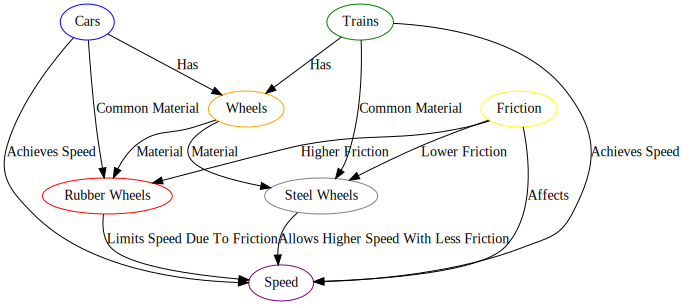

In [11]:
generate_graph("What is the relationship between cars, wheels and trains in relation to the speed that can be achieved relative to the friction of the wheel and the difference of the material the wheel is made of comparing rubber and steel wheels").visualize()